# Bank Customer Churn Model

# Import Library

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

# Import Data

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv")

# Analyse Data

In [10]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [12]:
df.duplicated('CustomerId').sum()

0

In [13]:
df = df.set_index('CustomerId')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Encoding

In [15]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
df.replace({'Geography' : {'France' : 2, 'Germany' : 1, 'Spain' : 0}}, inplace = True)

In [17]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [18]:
df.replace({'Gender' : {'Male' : 0, 'Female' : 1}}, inplace = True)

In [19]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [20]:
df.replace({'Num Of Products' : {1 : 0, 2 : 1, 3 : 1, 4 : 1}}, inplace = True)

In [21]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [22]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [23]:
df.loc[(df['Balance'] == 0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [24]:
df['Zero Balance'] = np.where(df['Balance'] > 0, 1, 0)

<AxesSubplot:>

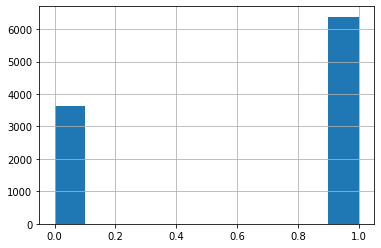

In [25]:
df['Zero Balance'].hist()

In [26]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define Label and Features

In [27]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [28]:
x = df.drop(['Surname', 'Churn'], axis = 1)

In [29]:
y = df['Churn']

In [30]:
x.shape, y.shape

((10000, 11), (10000,))

# Sampling The Data

In [31]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

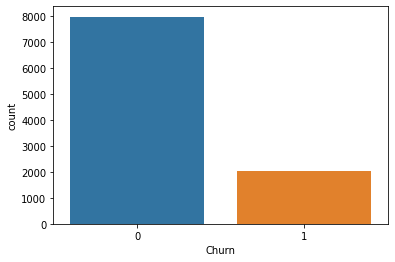

In [32]:
sns.countplot(x = 'Churn', data = df)

In [33]:
x.shape, y.shape

((10000, 11), (10000,))

# Random UnderSampling

In [34]:
from imblearn.under_sampling import RandomUnderSampler

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
rus = RandomUnderSampler(random_state = 2529)

In [ ]:
x_rus, y_rus = rus.fit_resample(x, y)

In [ ]:
x_rus.shape, y_rus.shape, x.shape, y.shape

In [ ]:
y.value_counts()

In [ ]:
y_rus.value_counts()

In [ ]:
y_rus.plot(kind = 'hist')

# Random OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state = 2529)

In [ ]:
x_ros, y_ros = ros.fit_resample(x, y)

In [ ]:
x_ros.shape, y_ros.shape, x.shape, y.shape

In [ ]:
y.value_counts()

In [ ]:
y_ros.value_counts()

In [ ]:
y_ros.plot(kind = 'hist')

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split Original Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2529)

# Split Random Under Sample Data

In [ ]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size = 0.3, random_state = 2529)

# Split Random Over Sample Data

In [ ]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 2529)

# Standardize Features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

# Standardize Original Data

In [ ]:
x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [ ]:
x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# Standardize Random Under Sample Data

In [ ]:
x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [ ]:
x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# Standardize Random Over Sample Data

In [ ]:
x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [ ]:
x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# Support vector machine Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(x_train, y_train)

In [ ]:
y_pred = svc.predict(x_test)

# Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

# Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C' : [0.1, 1, 10], 'gamma' : [1, 0.1, 0.01], 'kernel' : ['rbf'], 'class_weight' : ['balanced']}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv = 2)

In [ ]:
grid.fit(x_train, y_train)

In [ ]:
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(x_test)

In [ ]:
confusion_matrix(y_test, grid_predictions)

In [ ]:
print(classification_report(y_test, grid_predictions))

# Model with Random Under Sampling

In [ ]:
svc_rus = SVC()

In [ ]:
svc_rus.fit(x_train_rus, y_train_rus)

In [ ]:
y_pred_rus = svc_rus.predict(x_test_rus)

# Model Accuracy

In [ ]:
confusion_matrix(y_test_rus, y_pred_rus)

In [ ]:
print(classification_report(y_test_rus, y_pred_rus))

# Hyperparameter Tunning

In [ ]:
param_grid = {'C' : [0.1, 1, 10], 'gamma' : [1, 0.1, 0.01], 'kernel' : ['rbf'], 'class_weight' : ['balanced']}

In [ ]:
grid_rus = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv = 2)

In [ ]:
grid_rus.fit(x_train_rus, y_train_rus)

In [ ]:
print(grid_rus.best_estimator_)

In [ ]:
grid_pred_rus = grid_rus.predict(x_test_rus)

In [ ]:
confusion_matrix(y_test_rus, grid_pred_rus)

In [ ]:
print(classification_report(y_test_rus, grid_pred_rus))

# Model with Random Over Sampling

In [ ]:
svc_ros = SVC()

In [ ]:
svc_ros.fit(x_train_ros, y_train_ros)

In [ ]:
y_pred_ros = svc_ros.predict(x_test_ros)

# Model Accuracy

In [ ]:
confusion_matrix(y_test_ros, y_pred_ros)

In [ ]:
print(classification_report(y_test_ros, y_pred_ros))

# Hyperparameter Tunning

In [ ]:
param_grid = {'C' : [0.1, 1, 10], 'gamma' : [1, 0.1, 0.01], 'kernel' : ['rbf'], 'class_weight' : ['balanced']}

In [ ]:
grid_ros = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv = 2)

In [ ]:
grid_ros.fit(x_train_ros, y_train_ros)

In [ ]:
print(grid_ros.best_estimator_)

In [ ]:
grid_pred_ros = grid_ros.predict(x_test_ros)

In [ ]:
confusion_matrix(y_test_ros, grid_pred_ros)

In [ ]:
print(classification_report(y_test_ros, grid_pred_ros))

# Lets Compare

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(classification_report(y_test, grid_predictions))

In [ ]:
print(classification_report(y_test_rus, y_pred_rus))

In [ ]:
print(classification_report(y_test_rus, grid_pred_rus))

In [ ]:
print(classification_report(y_test_ros, y_pred_ros))

In [ ]:
print(classification_report(y_test_ros, grid_pred_ros))